In [1]:
#Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Import arrest data
arrest_df = pd.read_csv(r"C:\Users\barrb\Downloads\Arrest Data - ARRESTS.csv")

In [3]:
#View columns
arrest_df.columns

Index(['_id', 'PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME',
       'ARRESTLOCATION', 'OFFENSES', 'INCIDENTLOCATION',
       'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

In [4]:
#Reduce columns to only necessary ones
arrest_columns = ['AGE', 'GENDER', 'RACE','OFFENSES', 'ARRESTTIME','INCIDENTZONE','X', 'Y']

In [5]:
#Create new dataframe to reference new columns
mj_arrest = arrest_df[arrest_columns]

In [6]:
#Create a condition to only view marijuana-related arrests
where_condition_arrest = mj_arrest['OFFENSES'].str.contains("Marijuana|Controlled Substance", na=False)

In [7]:
#Create new dataframe to reference only marijuana-related arrest
mj_only_arrest = mj_arrest[where_condition_arrest]

In [8]:
#Import citation data
citation_df = pd.read_csv(r"C:\Users\barrb\Downloads\Citation Data - CITATIONS.csv")

In [9]:
#View citation columns
citation_df.columns

Index(['_id', 'PK', 'CCR', 'GENDER', 'RACE', 'AGE', 'CITEDTIME',
       'INCIDENTLOCATION', 'OFFENSES', 'NEIGHBORHOOD', 'ZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

In [10]:
#Reduce the number of columns to only necessary ones
citation_columns = ['GENDER', 'RACE', 'AGE','OFFENSES', 'CITEDTIME','ZONE','X', 'Y']

In [11]:
#Create new datafram to reference new columns
mj_citation = citation_df[citation_columns]

In [12]:
#Create a condition to only reference marijuana-ralated citations
where_condition_citation = mj_citation['OFFENSES'].str.contains("Marijuana", case=False)

In [13]:
#Create a new dataframe to reference only marijuana-related citations
mj_only_citation = mj_citation[where_condition_citation]

In [14]:
#Create a "record type" for arrest and citation
mj_only_arrest['record_type']="Arrest"
mj_only_citation['record_type']="Citation"

C:\Users\barrb\AppData\Local\Temp\ipykernel_5324\1419679407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mj_only_arrest['record_type']="Arrest"
C:\Users\barrb\AppData\Local\Temp\ipykernel_5324\1419679407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mj_only_citation['record_type']="Citation"


In [16]:
#Change column to "ZONE" for arrest and CITEDTIME and ARRESTTIME to DATE so that the two dfs can be merged
mj_only_arrest = mj_only_arrest.rename(columns={
    'INCIDENTZONE': 'ZONE', 
    'ARRESTTIME': 'DATE'})
mj_only_citation = mj_only_citation.rename(columns={
    'CITEDTIME': 'DATE',})

In [17]:
#Combine the two transformed dataframs into one dataframe
pd.concat([mj_only_arrest, mj_only_citation], axis=0)

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Con...,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Parapherna...,2016-08-27 2:04:00,1,-79.999646,40.455364,Arrest
19,22.0,M,B,13(a)(16) Possession of Controlled Substance /...,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of C...,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest
...,...,...,...,...,...,...,...,...,...
16259,26.0,M,B,627.02(b)(i) Possessing a small amount of mari...,2023-11-05 1:04:00,3,-79.982650,40.428755,Citation
16270,26.0,M,B,627.02(b)(i) Possessing a small amount of mari...,2023-11-07 17:46:00,3,-79.984467,40.403678,Citation
16280,23.0,M,B,627.02(b)(i) Possessing a small amount of mari...,2023-11-11 1:14:00,3,-79.983310,40.428693,Citation
16281,28.0,M,B,627.02(b)(i) Possessing a small amount of mari...,2023-11-11 1:23:00,3,-79.983310,40.428693,Citation


In [18]:
#Create new dataframe to reference the combined data
mj_df = pd.concat([mj_only_arrest, mj_only_citation], axis=0)

In [19]:
#Change DATE to datetime in order to make a line graph of marijuana arrests and citations by year

In [20]:
mj_df['DATE'] = pd.to_datetime(mj_df['DATE'])

In [21]:
mj_df['YEAR'] = [x.year for x in mj_df['DATE']]

In [22]:
#Create a line graph including both arrest and citation rates across time

In [23]:
arrest_citation_by_year = mj_df.loc[(mj_df['YEAR'] >= 2017) & (mj_df['YEAR'] <= 2023)].\
                    groupby(['YEAR', 'record_type']).\
                    aggregate(Offenses = ('OFFENSES','count')).\
                    reset_index().\
                    set_index('YEAR').\
                    copy()

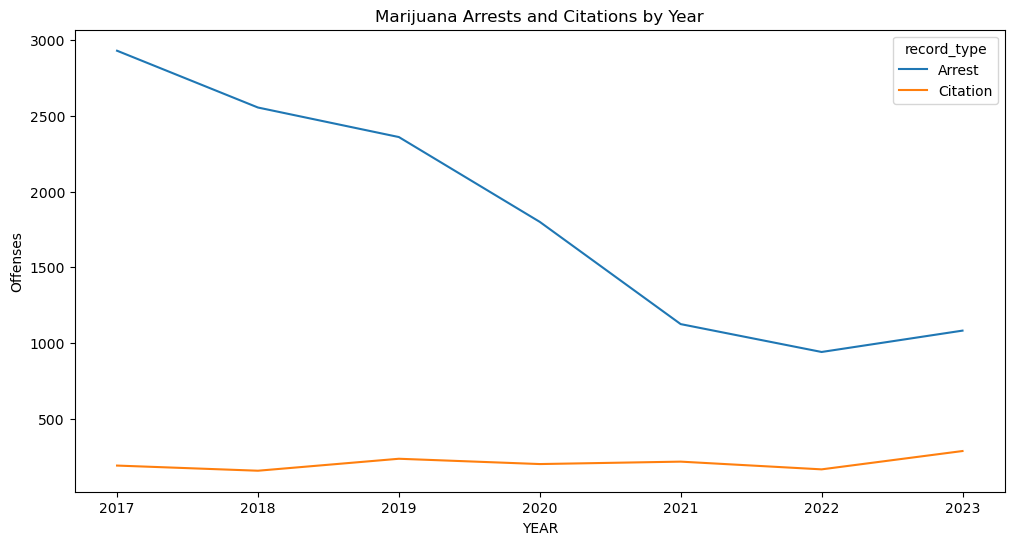

In [120]:
plt.figure(figsize=(12,6))
sns.lineplot(data=arrest_citation_by_year, x="YEAR", y="Offenses", hue='record_type', color=color)
plt.title('Marijuana Arrests and Citations by Year')
plt.show()

In [26]:
#Plot a bar graph for total number of arrests and citations by year and zone (2023)

In [27]:
mj_2023 = mj_df[mj_df['DATE'].dt.year == 2023]

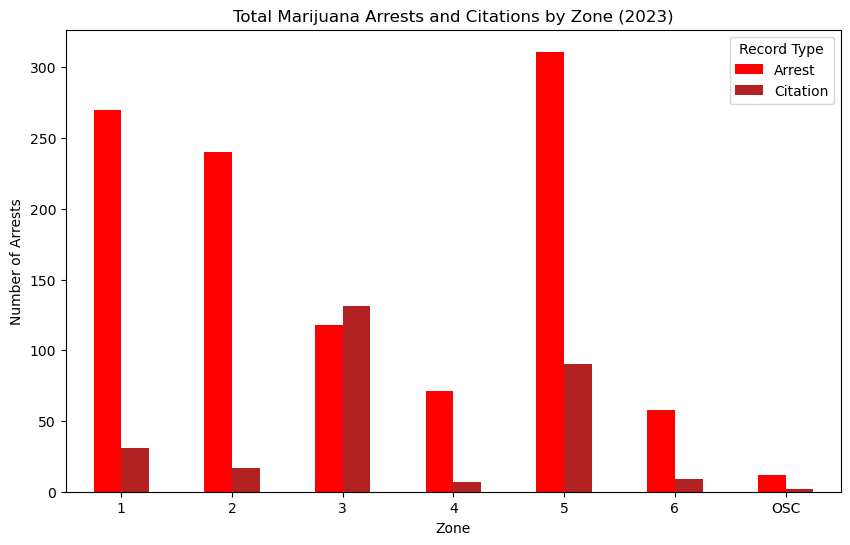

In [118]:
totatl_arrests_2023 = mj_2023.groupby(['ZONE', 'record_type']).size().unstack()
color = ['Red', 'Firebrick']

totatl_arrests_2023.plot(kind='bar', color=color, figsize=(10, 6))
plt.title('Total Marijuana Arrests and Citations by Zone (2023)')
plt.xlabel('Zone')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.legend(title='Record Type')
plt.show()

In [32]:
#Create graph of portion of arrest by race for each year

In [33]:
mj_white_arrest = mj_df[mj_df['RACE']== "W"]

In [34]:
mj_black_arrest = mj_df[mj_df['RACE']== "B"]

In [37]:
mj_white_arrest_only = mj_white_arrest[mj_white_arrest['record_type']=='Arrest']

In [38]:
mj_black_arrest_only = mj_black_arrest[mj_black_arrest['record_type']=='Arrest']

In [39]:
mj_white_count = mj_white_arrest_only.groupby(['YEAR', 'record_type']).size().reset_index(name='count')
mj_black_count = mj_black_arrest_only.groupby(['YEAR', 'record_type']).size().reset_index(name='count')

In [40]:
mj_white_count_year = mj_white_arrest_only[mj_white_arrest_only['YEAR']>=2016]
mj_black_count_year = mj_black_arrest_only[mj_black_arrest_only['YEAR']>=2016]

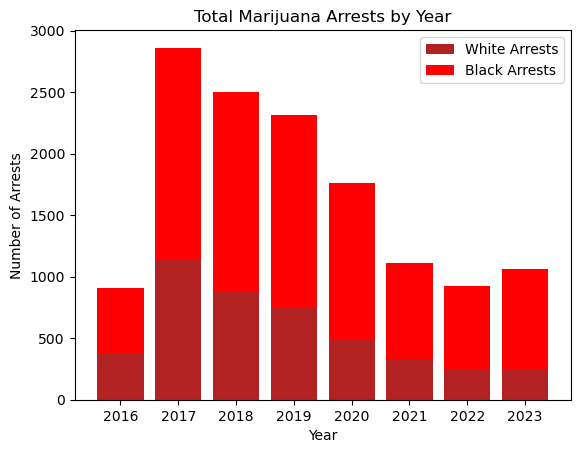

In [122]:
x = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
y1 = mj_white_count_year.groupby(['YEAR']).size()
y2 = mj_black_count_year.groupby(['YEAR']).size()

plt.bar(x, y1,color='firebrick')
plt.bar(x, y2, bottom=y1, color='Red')
plt.legend(["White Arrests", "Black Arrests"])
plt.title('Total Marijuana Arrests by Year')
plt.ylabel('Number of Arrests')
plt.xlabel('Year')
plt.show()

In [48]:
#Create graph of portion of Citations by race for each year

In [49]:
mj_white_citation = mj_df[mj_df['RACE']== "W"]
mj_black_citation = mj_df[mj_df['RACE']== "B"]

In [50]:
mj_white_citation_only = mj_white_citation[mj_white_citation['record_type']=='Citation']
mj_black_citation_only = mj_black_citation[mj_black_citation['record_type']=='Citation']

In [51]:
mj_white_cit_count = mj_white_citation_only.groupby(['YEAR', 'record_type']).size().reset_index(name='count')
mj_black_cit_count = mj_black_citation_only.groupby(['YEAR', 'record_type']).size().reset_index(name='count')

In [52]:
mj_white_citation_year = mj_white_citation_only[mj_white_citation_only['YEAR']>=2016]
mj_black_citation_year = mj_black_citation_only[mj_black_citation_only['YEAR']>=2016]

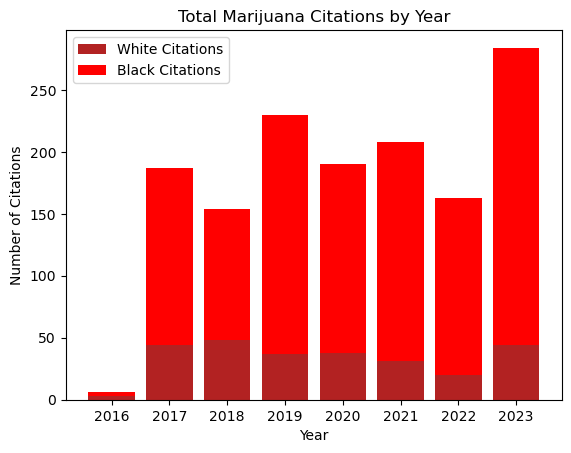

In [124]:
x = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
y1 = mj_white_citation_year.groupby(['YEAR']).size()
y2 = mj_black_citation_year.groupby(['YEAR']).size()

plt.bar(x, y1,color='firebrick')
plt.bar(x, y2, bottom=y1, color='red')
plt.legend(["White Citations", "Black Citations"])
plt.title('Total Marijuana Citations by Year')
plt.ylabel('Number of Citations')
plt.xlabel('Year')
plt.show()

In [55]:
#Create graph for total arrest by race and gender by age 

In [56]:
#Create age bins 
bins = [9, 20, 40, 65, np.inf]
cats = ["9-20", "20-40", "40-65", "65+"]
mj_df['AgeRange'] = pd.cut(mj_df['AGE'], bins, labels=cats)

In [57]:
#Create a column to combine GENDER and RACE 
mj_df["GENDERRACE"] = mj_df['GENDER'] + mj_df['RACE']

In [58]:
#Create a new df for arrests only 
mj_arrest_df = mj_df[mj_df['record_type']=="Arrest"]

In [59]:
mj_gender_sex_df = mj_arrest_df.groupby(['AgeRange', 'GENDERRACE']).size().reset_index()

C:\Users\barrb\AppData\Local\Temp\ipykernel_5324\3923097802.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mj_gender_sex_df = mj_arrest_df.groupby(['AgeRange', 'GENDERRACE']).size().reset_index()


In [60]:
#Create a variable to capture only the combination of gender and race needed for analysis 
included_gr = ["MB", "MW", "FB", "FW", "MA", "FA", "MH", "FH"]

In [61]:
mj_gender_sex_count = mj_gender_sex_df[mj_gender_sex_df['GENDERRACE'].isin(included_gr)]

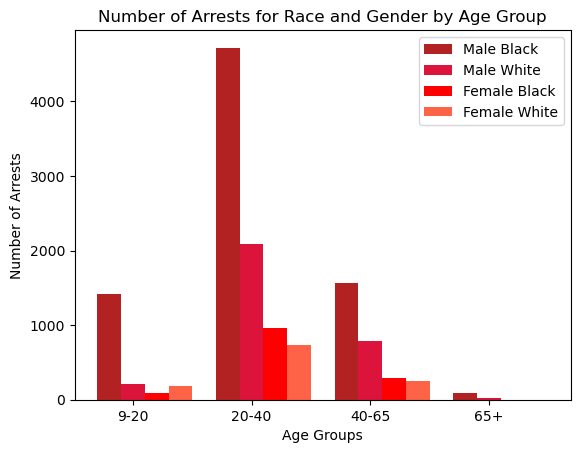

In [153]:
#Graph the relationship between arrest rate by gender and race by sex
xlabel = mj_gender_sex_count['AgeRange'].drop_duplicates()
x = np.arange(4)
y1 = mj_gender_sex_count[mj_gender_sex_count["GENDERRACE"] == "MB"][0].to_numpy()
y2 = mj_gender_sex_count[mj_gender_sex_count["GENDERRACE"] == "MW"][0].to_numpy()
y3 = mj_gender_sex_count[mj_gender_sex_count["GENDERRACE"] == "FB"][0].to_numpy()
y4 = mj_gender_sex_count[mj_gender_sex_count["GENDERRACE"] == "FW"][0].to_numpy()

width = .2
plt.xticks(x, xlabel)
offset = .2
plt.bar(x - offset, y1, width, color="firebrick")
plt.bar(x, y2, width, color="crimson")
plt.bar(x + offset, y4, width, color="red")
plt.bar(x + offset*2, y3, width, color="tomato")


plt.legend(["Male Black", "Male White", "Female Black", "Female White"])
plt.xlabel("Age Groups")
plt.ylabel("Number of Arrests")
plt.title("Number of Arrests for Race and Gender by Age Group")
plt.show()

In [65]:
#Create a new df for citations only 
mj_citation_df = mj_df[mj_df['record_type']=="Citation"]

In [69]:
mj_gender_sex_citation = mj_citation_df.groupby(['AgeRange', 'GENDERRACE']).size().reset_index()

C:\Users\barrb\AppData\Local\Temp\ipykernel_5324\1194591222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mj_gender_sex_citation = mj_citation_df.groupby(['AgeRange', 'GENDERRACE']).size().reset_index()


In [70]:
#Create a variable to capture only the combination of gender and race needed for analysis 
included_gr = ["MB", "MW", "FB", "FW"]

In [75]:
mj_gender_sex_count_citation = mj_gender_sex_citation[mj_gender_sex_citation['GENDERRACE'].isin(included_gr)]

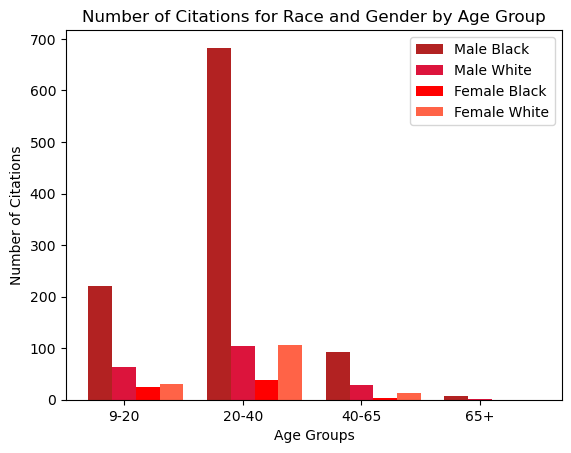

In [154]:
xlabel = mj_gender_sex_count_citation['AgeRange'].drop_duplicates()
x = np.arange(4)
y1 = mj_gender_sex_count_citation[mj_gender_sex_count_citation["GENDERRACE"] == "MB"][0].to_numpy()
y2 = mj_gender_sex_count_citation[mj_gender_sex_count_citation["GENDERRACE"] == "MW"][0].to_numpy()
y3 = mj_gender_sex_count_citation[mj_gender_sex_count_citation["GENDERRACE"] == "FB"][0].to_numpy()
y4 = mj_gender_sex_count_citation[mj_gender_sex_count_citation["GENDERRACE"] == "FW"][0].to_numpy()

width = .2
plt.xticks(x, xlabel)
offset = .2
plt.bar(x - offset, y1, width, color="firebrick")
plt.bar(x, y2, width, color="crimson")
plt.bar(x + offset, y4, width, color="red")
plt.bar(x + offset*2, y3, width, color="tomato")
plt.legend(["Male Black", "Male White", "Female Black", "Female White"])
plt.xlabel("Age Groups")
plt.ylabel("Number of Citations")
plt.title("Number of Citations for Race and Gender by Age Group")
plt.show()

In [89]:
#Create a pie chart to compare the number of single offesnse, multiple offense, and citation

In [92]:
#Create a condition to capture multiple offenses to compare single vs multiple offenses
mj_only_arrest.loc[:, 'multiple_offenses'] = mj_only_arrest['OFFENSES'].str.contains('/')
# There are no cases where a citation lists multiple offenses, so automatically set the 'multiple_offenses' column to False where record_type is 'citation', to avoid confusion.
mj_only_arrest.loc[mj_only_arrest['record_type'] == 'citation', 'multiple_offenses'] = False

In [91]:
multiple_offenses_df = mj_only_arrest[mj_only_arrest['multiple_offenses'] == True]
multiple_offenses_df = multiple_offenses_df.drop('multiple_offenses', axis=1)

In [ ]:
single_offense_df = mj_only_arrest[mj_only_arrest['multiple_offenses'] == False]
single_offense_df = single_offense_df.drop('multiple_offenses', axis=1)

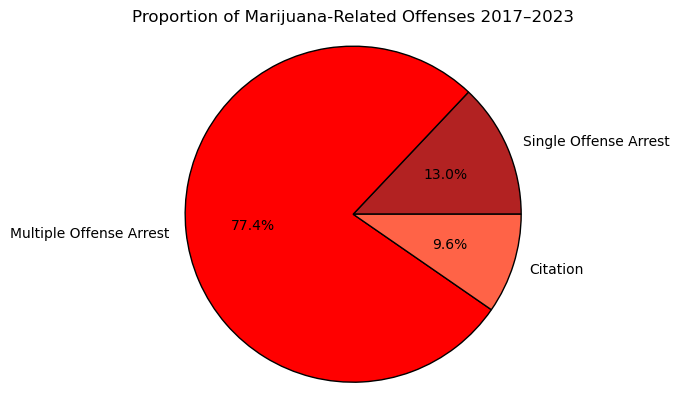

In [102]:
labels = ['Single Offense Arrest', 'Multiple Offense Arrest', 'Citation']
sizes = [1968 , 11760, 1462]
colors = ['firebrick', 'red', 'tomato']

# Create the pie chart
fig, ax = plt.subplots()
plt.title("Proportion of Marijuana-Related Offenses 2017–2023")
ax.pie(sizes, labels=labels, wedgeprops={'edgecolor': 'black'}, colors=colors, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

In [104]:
#fin